In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data2.csv")

In [3]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [4]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [5]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [6]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Conv1D(filters=140,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(70,1), 
                 activation='relu'))

In [10]:
model.add(MaxPooling1D(pool_size=1))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(70, activation='tanh'))

In [13]:
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 68, 140)           560       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 68, 140)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9520)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                666470    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 71        
Total params: 667,101
Trainable params: 667,101
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 62752 samples, validate on 15689 samples
Epoch 1/30
62752/62752 [==============================] - 69s 1ms/step - loss: 0.6839 - acc: 0.5917 - val_loss: 0.6517 - val_acc: 0.6126
Epoch 2/30
62752/62752 [==============================] - 47s 756us/step - loss: 0.6518 - acc: 0.6209 - val_loss: 0.6506 - val_acc: 0.6195
Epoch 3/30
62752/62752 [==============================] - 51s 816us/step - loss: 0.6503 - acc: 0.6209 - val_loss: 0.6514 - val_acc: 0.6130
Epoch 4/30
62752/62752 [==============================] - 29s 469us/step - loss: 0.6499 - acc: 0.6212 - val_loss: 0.6497 - val_acc: 0.6170
Epoch 5/30
62752/62752 [==============================] - 40s 644us/step - loss: 0.6484 - acc: 0.6232 - val_loss: 0.6507 - val_acc: 0.6146
Epoch 6/30
62752/62752 [==============================] - 61s 976us/step - loss: 0.6479 - acc: 0.6225 - val_loss: 0.6485 - val_acc: 0.6168
Epoch 7/30
62752/62752 [==============================] - 65s 1ms/step - loss: 0.6475 - acc: 0.6250 - val_loss: 0.6479

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

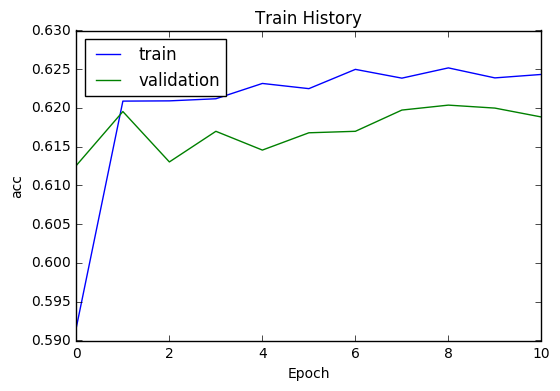

In [18]:
show_train_history(train_history,'acc','val_acc')

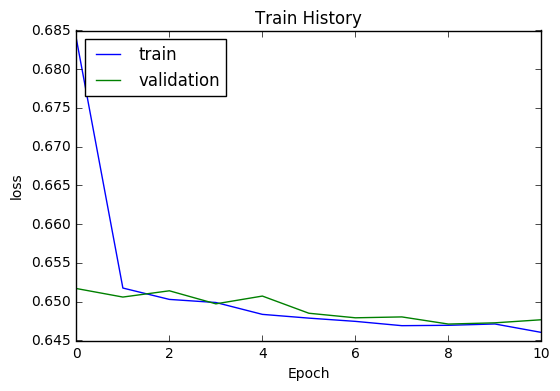

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 13s 673us/step


In [21]:
scores[1]

0.6229157105554014